##### Traing project , Using Data set for sonar waves to detect whether the object is Rock or Mine
##### I will use KNN-Model
##### I will also work with Pipeline and Grid Search CV 
##### Dataset copyright by Pierian Data Inc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing the data

In [3]:
df = pd.read_csv('sonar.all-data.csv')

In [4]:
# Data exploration

In [5]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

<AxesSubplot:>

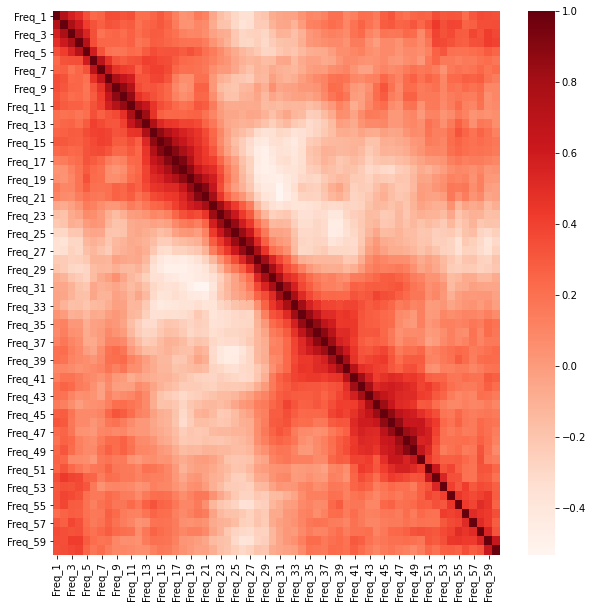

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Reds')

In [8]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [9]:
# Spliting the features and Label
X=df.drop('Label',axis =1)
y=df.Label

In [10]:
# Spliting the training data-set and test data-set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [11]:
#Cearting a Pipeline has Standardizing object and the KNN model

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.pipeline import Pipeline


steps = [('Scaler',sc),
         ('KNN_Model',knn)]
Pipe = Pipeline(steps =steps)
Pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('KNN_Model', KNeighborsClassifier())])

In [13]:
#Making a grid search cv model to check the performance of each k value

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'KNN_Model__n_neighbors':list(range(1,40))}
grid_model = GridSearchCV(estimator=Pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2)

In [15]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV] END ...........................KNN_Model__n_neighbors=1; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=1; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=1; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=1; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=1; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=2; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=2; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=2; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=2; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=2; total time=   0.0s
[CV] END ...........................KNN_Model__n_neighbors=3; total time=   0.0s
[CV] END ...........................KNN_Model__

[CV] END ..........................KNN_Model__n_neighbors=23; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=23; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=24; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=24; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=24; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=24; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=24; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=25; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=25; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=25; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=25; total time=   0.0s
[CV] END ..........................KNN_Model__n_neighbors=25; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('KNN_Model', KNeighborsClassifier())]),
             param_grid={'KNN_Model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20, 21, 22, 23,
                                                    24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=2)

In [16]:
# Checking the best k for model performance
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()),
  ('KNN_Model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'Scaler': StandardScaler(),
 'KNN_Model': KNeighborsClassifier(n_neighbors=1),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'KNN_Model__algorithm': 'auto',
 'KNN_Model__leaf_size': 30,
 'KNN_Model__metric': 'minkowski',
 'KNN_Model__metric_params': None,
 'KNN_Model__n_jobs': None,
 'KNN_Model__n_neighbors': 1,
 'KNN_Model__p': 2,
 'KNN_Model__weights': 'uniform'}

In [17]:
#lets make a plot to visiualize the relation between numper of k and accuracy

In [18]:
pd.DataFrame(grid_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN_Model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011069,0.000303,0.007406,0.000400,1,{'KNN_Model__n_neighbors': 1},0.894737,0.710526,0.837838,0.918919,0.864865,0.845377,0.072755,1
1,0.006617,0.001960,0.004282,0.000863,2,{'KNN_Model__n_neighbors': 2},0.894737,0.684211,0.810811,0.702703,0.810811,0.780654,0.077732,2
2,0.006343,0.001591,0.004484,0.001021,3,{'KNN_Model__n_neighbors': 3},0.894737,0.684211,0.783784,0.729730,0.783784,0.775249,0.070403,3
3,0.007415,0.001947,0.004069,0.000878,4,{'KNN_Model__n_neighbors': 4},0.894737,0.657895,0.783784,0.702703,0.756757,0.759175,0.080542,6
4,0.005825,0.000726,0.005096,0.001261,5,{'KNN_Model__n_neighbors': 5},0.894737,0.631579,0.783784,0.675676,0.810811,0.759317,0.094765,5


In [19]:
accuracy = pd.DataFrame(grid_model.cv_results_)[['param_KNN_Model__n_neighbors','mean_test_score']]

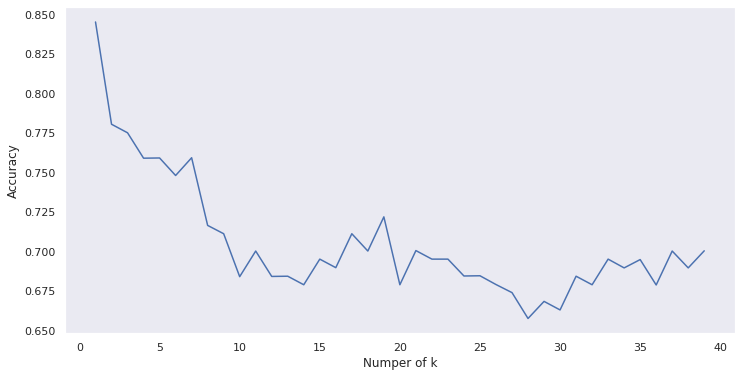

In [20]:
sns.set_theme(style='dark')
plt.figure(figsize=(12,6))
plt.plot('param_KNN_Model__n_neighbors','mean_test_score',data = accuracy)
plt.xlabel('Numper of k')
plt.ylabel('Accuracy')

plt.show()

In [21]:
# Evaluate the performance

In [22]:
y_pred = grid_model.predict(X_test)

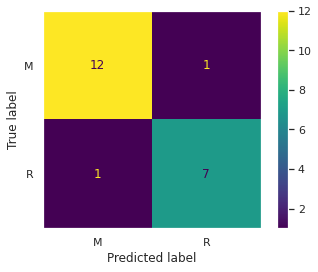

In [23]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_model,X_test,y_test)

In [24]:
#Acurracy , recall, precision, and F1-score
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



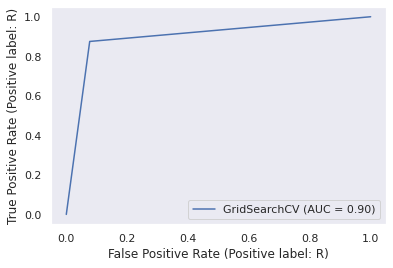

In [25]:
# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_model,X_test,y_test)